<a href="https://colab.research.google.com/github/mechhector/visao_computacional20212/blob/main/trabalho1/q3_gaussian_filter_DIP_20212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To generate the gaussian kernel. Based on the Professor Navar's code and Gonzalez and Woods (2008)

def gaussian(d1, d2):
  
  x, y = np.mgrid[0:d2, 0:d1]
  x = x-d2/2
  y = y-d1/2
  sigma = 4 # std deviation
  a = np.exp( -(x**2 + y**2) / (2 * sigma**2) )
  return a / a.sum()

In [ ]:
# PDI 2021.2 Trabalho 1 
# Hector Leonardo Mota Moreira

# Gaussian Filter

import numpy as np
import cv2
import math as m
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow


# ========= Loading the image =========

img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/joaninha.jpg', 0)

# ========= Kernel Dimensions ========= 

k = int(input('Informe a dimensão do kernel desejado:'))

gaussian_kernel = gaussian(k,k)

c = int (k/2) # Just do simplify; k is the kernel dimension (k x k)

# ======= Number of Iterations ======== 

n = int(input('Informe o número de aplicações do filtro: '))

# =========== Image Content =========== 

image_content = input('Conteúdo da imagem: ')

# ============== Padding ===============

padding = int(input('Padding? '))


print('Dimensões do Kernel:', gaussian_kernel.shape)

print('Dimensões da Imagem:', img.shape)

print(gaussian_kernel)

Informe a dimensão do kernel desejado:5
Informe o número de aplicações do filtro: 3
Conteúdo da imagem: joaninha
Padding? 0
Dimensões do Kernel: (5, 5)
Dimensões da Imagem: (321, 481)
[[0.0310094  0.03513825 0.03740448 0.03740448 0.03513825]
 [0.03513825 0.03981686 0.04238482 0.04238482 0.03981686]
 [0.03740448 0.04238482 0.04511841 0.04511841 0.04238482]
 [0.03740448 0.04238482 0.04511841 0.04511841 0.04238482]
 [0.03513825 0.03981686 0.04238482 0.04238482 0.03981686]]


In [ ]:
# Padding

if padding == 1:

  line, column = (img.shape) 

  holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

  new_line, new_column = (holdpdd.shape)

  holdpdd [ c : new_line - c , c : new_column - c ] = img # Based on the Professor Navar's lecture.

  gaussian_image = holdpdd.copy()
    
  print(holdpdd.shape)

  # Convolution

  for i in range(n): 
    for x in range(c,gaussian_image.shape[0]-c):
      for y in range(c,gaussian_image.shape[1]-c):
        
        lol = gaussian_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
        
        gaussian_conv = (lol*gaussian_kernel).sum()
          
        gaussian_image [x,y] = round(gaussian_conv)

  # To remove the padding

  final_image = np.zeros((img.shape[0] , img.shape[1]))

  final_image = gaussian_image[ c : new_line - c , c : new_column - c ] 


# Without pad

else:

    gaussian_image = img.copy()

    for i in range(n): 
      for x in range(c,gaussian_image.shape[0]-c):
        for y in range(c,gaussian_image.shape[1]-c):
          
          lol = gaussian_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
          
          gaussian_conv = (lol*gaussian_kernel).sum()
              
          gaussian_image [x,y] = round(gaussian_conv)
    
    final_image = np.zeros((img.shape[0] , img.shape[1]))
    final_image = gaussian_image

#cv2_imshow(gaussian_image)
print(k,n)

5 3


[[ 73  70  71  95  97]
 [ 75  71  68  53  53]
 [ 79  73  66  26  49]
 [102  83  54  54  27]
 [ 76  91 110  33  19]]
5 3


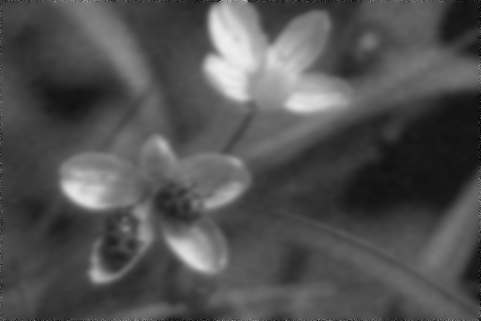

True

In [ ]:
print(lol)

print(k,n)

file_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q3_Gaussian_Filter/{}_k{}n{}pdd{}_gaussian_filter.png'

cv2_imshow(final_image)

cv2.imwrite(file_name.format(image_content,k,n,padding),final_image)

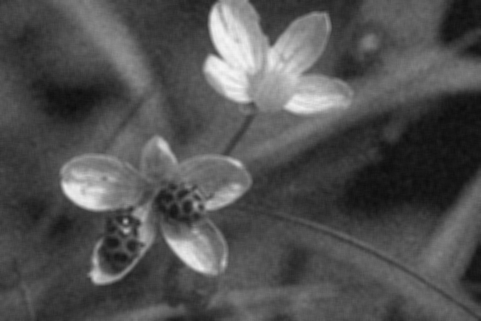

In [ ]:
# With OpenCV

blur = cv2.GaussianBlur(img,(5,5),4)
cv2_imshow(blur)